<a href="https://colab.research.google.com/github/Y3KHOA/Phan_Tich_Du_Lieu-T6/blob/main/DA_PT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ĐỒ ÁN KẾT THÚC MÔN HỌC
Phân tích dữ liệu và dự báo
GVHD: Nguyễn Trọng Nghĩa

Chương 1:
Giới thiệu về tập dữ liệu:
Đây là một tập dữ liệu nói về khả năng sống sót của bệnh nhân suy tim và các tình trạng liên quan.
Tập dữ liệu này bao gồm khảo sát 299 bệnh nhân suy tim được thu thập vào năm 2015. Tập dữ liệu bao gồm 35% nữ , 65% nam và có độ tuổi từ 40 trở lên.
Kích thước tập dữ liệu gồm 299 hàng (bệnh nhân) và 13 cột (tính năng).

In [ ]:
#cài đặt các thư viện cần thiết cho bài toán:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

import scipy.stats as st
import statsmodels.api as sm



In [ ]:
#đọc dữ liệu
df= pd.read_csv('/content/drive/MyDrive/CSV/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df['age']= pd.to_numeric(df['age'],errors='coerce')
df['anaemia']= pd.to_numeric(df['anaemia'],errors='coerce')
df['creatinine_phosphokinase']= pd.to_numeric(df['creatinine_phosphokinase'],errors='coerce')
df['diabetes']= pd.to_numeric(df['diabetes'],errors='coerce')
df['ejection_fraction']= pd.to_numeric(df['ejection_fraction'],errors='coerce')
df['high_blood_pressure']= pd.to_numeric(df['high_blood_pressure'],errors='coerce')
df['platelets']= pd.to_numeric(df['platelets'],errors='coerce')
df['serum_creatinine']= pd.to_numeric(df['serum_creatinine'],errors='coerce')
df['sex']= pd.to_numeric(df['sex'],errors='coerce')
df['time']= pd.to_numeric(df['time'],errors='coerce')
df['DEATH_EVENT']= pd.to_numeric(df['DEATH_EVENT'],errors='coerce')
df['smoking']= pd.to_numeric(df['smoking'],errors='coerce')
df['serum_sodium']= pd.to_numeric(df['serum_sodium'],errors='coerce')

In [ ]:
#Chương 3: Kiểm định giả thuyết


In [ ]:
#ANOVA
sub1=df.copy()
sub1=df[(df['smoking']==1)]
# print(sub1)


ct1=sub1.groupby('age').size()
ct2=sub1.groupby('DEATH_EVENT').size()


#tính ANOVA
print()
print('Ở những người hút thuốc thì liệu độ tuổi có ảnh hưởng đến khả năng tử vong trong thời gian điều trị không?')
model1=smf.ols(formula='age ~ C(DEATH_EVENT)',data=sub1)
results1=model1.fit()
print(results1.summary())

print()
print()



Ở những người hút thuốc thì liệu độ tuổi có ảnh hưởng đến khả năng tử vong trong thời gian điều trị không?
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     15.67
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           0.000147
Time:                        09:12:38   Log-Likelihood:                -361.73
No. Observations:                  96   AIC:                             727.5
Df Residuals:                      94   BIC:                             732.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [ ]:
#Mối liên hệ sự sống giữa phần trăm máu co bóp tim mỗi lần co bóp và thời gian bị bệnh


sub2=df[['ejection_fraction','time']]


sub2['ejection_fraction']=pd.to_numeric(sub2['ejection_fraction'], errors='coerce')
sub2['time']=pd.to_numeric(sub2['time'], errors='coerce')

# print(df['platelets'].value_counts())

sub2['ejection_fraction_1']=pd.qcut(sub2['ejection_fraction'],4,labels=['17% - 28%','29% - 40% ','41%-52%','>53%'])
c6=sub1['ejection_fraction'].value_counts().sort_index()
print(sub2.groupby('ejection_fraction_1').size())

model2 = smf.ols(formula='time ~ ejection_fraction_1', data=sub2)
results2=model2.fit()
print(results2.summary())

print()

print('Tính trung bình cho ejection_fraction')
m2=sub2.groupby('ejection_fraction_1').mean()
print(m2['time'])


print('Tính độ lệch chuẩn cho ejection_fraction')
sd2=sub2.groupby('ejection_fraction_1').std()
print(sd2['time'])




ejection_fraction_1
17% - 28%     93
29% - 40%     89
41%-52%       57
>53%          60
dtype: int64
                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.245
Date:                Fri, 29 Oct 2021   Prob (F-statistic):            0.00588
Time:                        09:18:19   Log-Likelihood:                -1718.6
No. Observations:                 299   AIC:                             3445.
Df Residuals:                     295   BIC:                             3460.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:

#phân tích sâu
mc1=multi.MultiComparison(sub2['time'],sub2['ejection_fraction_1'])
res1=mc1.tukeyhsd()
print(res1.summary())


     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
 17% - 28% 29% - 40%   35.9716 0.0089   6.7082  65.235   True
 17% - 28%    41%-52%  28.1975 0.1269   -4.999  61.394  False
 17% - 28%       >53%   5.2817    0.9 -27.3962 37.9596  False
29% - 40%     41%-52%  -7.7741    0.9 -41.2528 25.7047  False
29% - 40%        >53% -30.6899 0.0784 -63.6545  2.2747  False
   41%-52%       >53% -22.9158 0.3685 -59.4168 13.5852  False
-------------------------------------------------------------


In [ ]:
#Chi-quare
data=df.copy()
sub1 = data.copy()
print(sub1['age'].min())

40.0


In [ ]:
sub1['ser_1'] = pd.qcut(sub1.age,5,labels=["40 - 50","51- 61","62 - 72","73 - 83"," >83"])
c6=sub1['ser_1'].value_counts().sort_index()
sub3 = sub1[['time','ser_1']].dropna()
print (sub3['ser_1'].value_counts().sort_index())

40 - 50    74
51- 61     51
62 - 72    56
73 - 83    66
 >83       52
Name: ser_1, dtype: int64


In [ ]:
ct1=pd.crosstab(sub1['time'], sub1['ser_1'])
print (ct1)
# phần trăm cột
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

ser_1  40 - 50  51- 61  62 - 72  73 - 83   >83
time                                          
4            0       0        0        0     1
6            0       1        0        0     0
7            1       0        0        1     0
8            0       0        0        1     1
10           0       0        2        1     3
...        ...     ...      ...      ...   ...
270          0       0        2        0     0
271          0       1        0        0     0
278          1       0        0        0     0
280          1       0        0        0     0
285          1       0        0        0     0

[148 rows x 5 columns]
ser_1   40 - 50    51- 61   62 - 72   73 - 83       >83
time                                                   
4      0.000000  0.000000  0.000000  0.000000  0.019231
6      0.000000  0.019608  0.000000  0.000000  0.000000
7      0.013514  0.000000  0.000000  0.015152  0.000000
8      0.000000  0.000000  0.000000  0.015152  0.019231
10     0.000000  0.000000  0.

In [ ]:
# chi-square test
print ('chi-square, giá trị p, các số đếm mong đợi')
cs1= st.chi2_contingency(ct1)
print (cs1)

chi-square, giá trị p, các số đếm mong đợi
(564.2114764722432, 0.7529369612716356, 588, array([[0.24749164, 0.17056856, 0.18729097, 0.22073579, 0.17391304],
       [0.24749164, 0.17056856, 0.18729097, 0.22073579, 0.17391304],
       [0.49498328, 0.34113712, 0.37458194, 0.44147157, 0.34782609],
       [0.49498328, 0.34113712, 0.37458194, 0.44147157, 0.34782609],
       [1.48494983, 1.02341137, 1.12374582, 1.32441472, 1.04347826],
       [0.49498328, 0.34113712, 0.37458194, 0.44147157, 0.34782609],
       [0.24749164, 0.17056856, 0.18729097, 0.22073579, 0.17391304],
       [0.24749164, 0.17056856, 0.18729097, 0.22073579, 0.17391304],
       [0.49498328, 0.34113712, 0.37458194, 0.44147157, 0.34782609],
       [0.49498328, 0.34113712, 0.37458194, 0.44147157, 0.34782609],
       [0.24749164, 0.17056856, 0.18729097, 0.22073579, 0.17391304],
       [0.49498328, 0.34113712, 0.37458194, 0.44147157, 0.34782609],
       [0.24749164, 0.17056856, 0.18729097, 0.22073579, 0.17391304],
       [0.49498

In [ ]:
# thiết lập loại biến là phân loại
sub1["ser_1"] = sub1["ser_1"].astype('category')
sub1['time'] = pd.to_numeric(sub1['time'], errors='coerce')

Text(3.674999999999997, 0.5, 'thời gian nghỉ dưỡng')

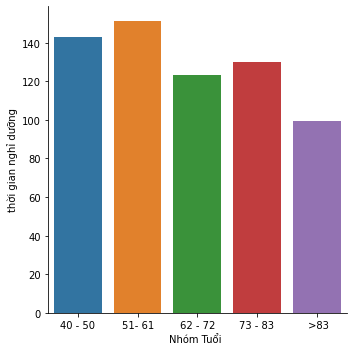

In [ ]:
# vẽ đồ thị phần trăm
seaborn.catplot(x="ser_1", y="time", data=sub1, kind="bar", ci=None)
plt.xlabel('Nhóm Tuổi ')
plt.ylabel('thời gian nghỉ dưỡng')

In [ ]:
# phân tích sâu nhóm (40 - 50) và (51 - 61)

c1 = sub1[(sub1['ser_1'] == "40 - 50")]

c2 = sub1[(sub1['ser_1']== "51- 61")]

c3 = c1.append(c2)


ct1=pd.crosstab(c3['ser_1'], sub1['time'])
print (ct1)



time     6    7    11   12   14   15   22   ...  250  257  258  271  278  280  285
ser_1                                       ...                                   
40 - 50    0    1    2    1    1    1    0  ...    3    1    0    0    1    1    1
51- 61     1    0    0    0    0    0    1  ...    1    0    1    1    0    0    0

[2 rows x 87 columns]


Text(0.5, 1.0, 'Scatterplot cho mối liên hệ giữa thời gian theo dõi bệnh và tuổi')

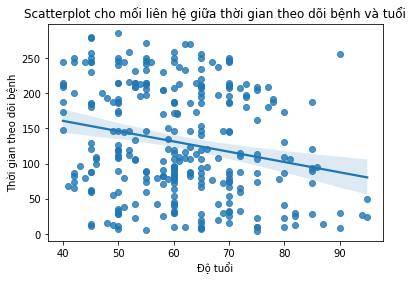

In [ ]:
scat1 = seaborn.regplot(x="age", y="time", data=data)
plt.xlabel('Độ tuổi')
plt.ylabel('Thời gian theo dõi bệnh')
plt.title('Scatterplot cho mối liên hệ giữa thời gian theo dõi bệnh và tuổi')

In [ ]:
print ('mối liên hệ giữa thời gian theo dõi và tuổi')
print (st.pearsonr(data['time'], data['age']))

mối liên hệ giữa thời gian theo dõi và tuổi
(-0.22406841997203522, 9.30319880215916e-05)


mô hình hồi quy OLS cho mối liên hệ giữa tuổi và thời gian tử vong do bệnh tim
                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     15.70
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           9.30e-05
Time:                        09:21:37   Log-Likelihood:                -1717.2
No. Observations:                 299   AIC:                             3438.
Df Residuals:                     297   BIC:                             3446.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

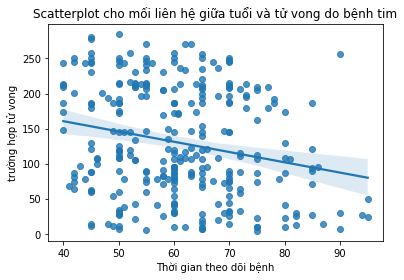

In [ ]:
scat1= seaborn.regplot(x='age',y='time',data=df)
plt.xlabel('Thời gian theo dõi bệnh')
plt.ylabel('trường hợp tử vong')
plt.title('Scatterplot cho mối liên hệ giữa tuổi và tử vong do bệnh tim') #tìm đc đường phù hợp

#tìm hệ số 
print('mô hình hồi quy OLS cho mối liên hệ giữa tuổi và thời gian tử vong do bệnh tim')
reg1= smf.ols('time ~ age',data=df).fit()# biến phản hồi ~ biến giải thích
print(reg1.summary())



In [ ]:
#tìm hệ số 
print('mô hình hồi quy OLS cho mối liên hệ giữa tuổi và thời gian tử vong do bệnh tim')
reg1= smf.ols('age ~ DEATH_EVENT',data=df).fit()# biến phản hồi ~ biến giải thích
print(reg1.summary())


mô hình hồi quy OLS cho mối liên hệ giữa tuổi và thời gian tử vong do bệnh tim
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     20.44
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           8.92e-06
Time:                        09:21:39   Log-Likelihood:                -1154.2
No. Observations:                 299   AIC:                             2312.
Df Residuals:                     297   BIC:                             2320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

Dep. Variable: đây là biến phản hồi... cho ta biết biến phản hồi ở đây là j 

chúng ta đang xét biến tuổi và biến tử vong do bệnh tim

No. Observations: là số lượng dòng dữ liệu của chúng ta

Prob (F-statistic): đó là giá trị P-value

>> do giá trị P-value nhỏ hơn rất nhiều với mức ý nghĩa là 0.05 nên có thể bác bỏ giả thuyết vô hiệu và chứng minh rằng chúng có quan hệ chặt chẽ với nhau

ở cột coef: có 2 hệ số là b và m

Intercept: hệ số cắt trục tung m

DEATH_EVENT: hệ số góc

>> kết quả thu đc phương trình hồi quy: age=58.7619 + 6.4534 * DEATH_EVENT

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Trung bình
                   age   anaemia  ...   smoking        time
DEATH_EVENT                       ...                      
0            58.761906  0.408867  ...  0.325123  158.339901
1            65.215281  0.479167  ...  0.312500   70.885417

[2 rows x 12 columns]

độ lệch chuẩn
                   age   anaemia  ...   smoking        time
DEATH_EVENT                       ...                      
0            58.761906  0.408867  ...  0.325123  158.339901
1            65.215281  0.479167  ...  0.312500   70.885417

[2 rows x 12 columns]


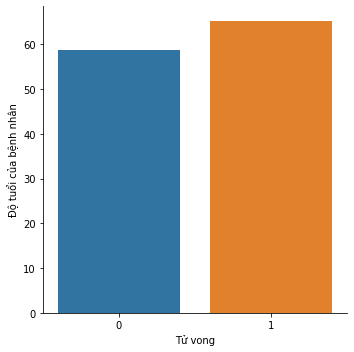

In [ ]:
seaborn.factorplot(x='DEATH_EVENT',y='age',data=df,kind='bar',ci=None)
plt.ylabel('Độ tuổi của bệnh nhân')
plt.xlabel('Tử vong')

# group means & sd
print('Trung bình')
ds1=df.groupby('DEATH_EVENT').mean()
print(ds1)
print()
print('độ lệch chuẩn')
ds2=df.groupby('DEATH_EVENT').mean()
print(ds2)

In [ ]:
df['ejection_fraction_2']=(df['ejection_fraction']-df['ejection_fraction'].mean()) # mức độ creatinin huyết thanh trong máu
print(df['ejection_fraction_2'].mean())

df['age_c']=(df['age']-df['age'].mean()) # mức độ creatinin huyết thanh trong máu
print(df['age'].mean())
#mô hình hồi quy đa biến
print('mô hình hồi quy đa biến')
reg2= smf.ols('time ~ age_c + anaemia + smoking + sex + ejection_fraction_2',data=df).fit()# biến phản hồi ~ biến giải thích + tỷ lệ phần trăm máu rời khỏi tim
print(reg2.summary())

2.352633138469897e-15
60.83389297658862
mô hình hồi quy đa biến
                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     4.373
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           0.000744
Time:                        09:21:45   Log-Likelihood:                -1714.2
No. Observations:                 299   AIC:                             3440.
Df Residuals:                     293   BIC:                             3463.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

60.83389297658862
-1.1881985547827763e-13
                            OLS Regression Results                            
Dep. Variable:                  age_c   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     15.70
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           9.30e-05
Time:                        09:21:47   Log-Likelihood:                -1156.4
No. Observations:                 299   AIC:                             2317.
Df Residuals:                     297   BIC:                             2324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept 

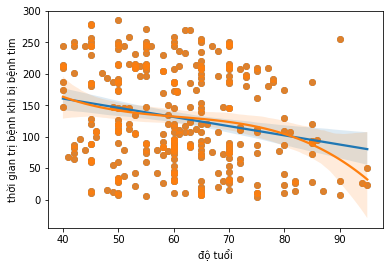

In [ ]:
#Hồi quy đa thức
scat2= seaborn.regplot(x='age',y='time',scatter=True,order=1,data=df)
scat3= seaborn.regplot(x='age',y='time',scatter=True,order=3,data=df)
plt.xlabel('độ tuổi')
plt.ylabel('thời gian trị bệnh khi bị bệnh tim')
df['age_c']=(df['age']-df['age'].mean()) # mức độ creatinin huyết thanh trong máu
print(df['age'].mean())
df['time_c']=(df['time']-df['time'].mean()) # mức độ creatinin huyết thanh trong máu
print(df['time_c'].mean())
#mô hình tuyến tính
reg3=smf.ols('age_c ~ time_c',data=df).fit()
print(reg3.summary())

reg3=smf.ols('age_c ~ time_c + I(time_c**3)',data=df).fit()
print(reg3.summary())

màu xanh hồi quy tuyến tính

còn màu cao là hồi quy da thức: cho ta bậc cao

cho thấy P nhỏ hơn 0.05--> có ý nghĩa

R-squared: hệ số pearson 5% cho thấy mối quan hệ giữa 2 biến gần như =0

Nếu sét theo mô hình tuyến tính--> hệ số tương quan ko có quan hệ chặt chẽ

In [ ]:
data['sex'] =pd.to_numeric(data['sex'], errors='coerce')
data['anaemia'] =pd.to_numeric(data['anaemia'], errors='coerce')
data['DEATH_EVENT'] =pd.to_numeric(data['DEATH_EVENT'], errors='coerce')
sub1['age_cd'] = sub1['age'] 

# canh chuẩn dữ liệu tuổi 
sub1["age"] = np.divide(sub1["age"] - sub1["age"].min(), sub1["age"].max() - sub1["age"].min())
#for x in range(sub1['age'].count()-1):
 # if(sub1['age'][x]>=70):
 #   sub1['age_cd'][x]= 1
  #else:
   # sub1['age_cd'][x]= 0

#print(sub1[['age','age_cd']].head(50))
lreg1 = smf.logit(formula = 'age ~ DEATH_EVENT ', data = sub1).fit()
print (lreg1.summary())

Optimization terminated successfully.
         Current function value: 0.629280
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    age   No. Observations:                  299
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                 -0.1231
Time:                        09:21:49   Log-Likelihood:                -188.15
converged:                       True   LL-Null:                       -167.53
Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.6583      0.148     -4.447      0.000      -0.948      -0.368
DEATH_EVENT     0.4917    

In [ ]:
#hồi quy logistic đơn biến: 1 x--> 1y
Ireg1=smf.logit(formula='DEATH_EVENT ~ age',data=df).fit()# biến giải thích ~ biến phản hồi
print(Ireg1.summary())

#tìm ODD
print('ODD') #tỉ số giữa xác suất hiện biến cố và không hiện biến cố
print(np.exp(Ireg1.params))
#==> kết luận: người có độ tuổi càng cao thì có nguy cơ tử vong cao hơn 1.04 lần so với người bình thường

# conf=  Ireg1.conf_int()
# conf['ODD']=Ireg1.params()
# conf.columns=['Lower CI', ' Upper CI', 'ODD']
# print(np.exp(conf))


Optimization terminated successfully.
         Current function value: 0.595306
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            1
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                 0.05157
Time:                        06:30:53   Log-Likelihood:                -178.00
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 1.085e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6543      0.707     -5.172      0.000      -5.039      -2.269
age            0.0469      0.

In [ ]:
#lreg1 = smf.logit(formula = ' ~ DEATH_EVENT  ', data = sub1).fit()
#print (lreg1.summary())

ValueError: ignored

No. Observations: số lượng quan sát

Dep. Variable: biến phản hồi

>> phương trình thu đc: Death_event= -3.6543 + 0.0469* age

==> phương trình này ko phù hợp nếu thực hiện hồi quy logistic... biến phản hồi chỉ nhận 0 or 1 ... nên khi sử dụng mô hình này tìm đường phù hợp thì ko đc

>>==> nhận xét: có 97.5% khả năng ODD của

In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split

import cv2

In [ ]:
import sklearn

In [ ]:
array= df.values
x= array[:,0:12] #features
y= array[:,12] #label/target
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

#max_depth: độ sâu của cây
clf=tree.DecisionTreeClassifier(max_depth=10)
clf=clf.fit(x_train,y_train)

#dự đoán: 
pre=clf.predict(x_test)
print(pre)
print()
print(y_test)
print()

conf_ma=sklearn.metrics.confusion_matrix(y_test,pre)
acc_sore=sklearn.metrics.accuracy_score(y_test,pre)

#confusion matrix: những cái j trên đường chéo chính là nó dự đoán đúng
print(conf_ma)
print()
print(acc_sore)

# vẽ cây
feauture= df.columns[0:12] # getidicator feature
target= df['DEATH_EVENT'].unique()
print(target)

dot_data= tree.export_graphviz(clf,out_file='/content/drive/MyDrive/tree_ID3.txt'
                               ,feature_names=feauture
                               ,class_names=str(target))
#

[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.]

[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]

[[31  6]
 [ 8 15]]

0.7666666666666667
[1 0]


#kết quả dự đoán của huấn luyện 

kết quả chết có 37 thì 31 đúng 6 sai 

kết quả sống có 23 mẫu 8 đúng 15 sai 
